In [49]:
import numpy as np
import pandas as pd
data = pd.read_csv("Final Config - Sheet2.csv")
data

,executor_instances,executor_memory,executor_cores,driver_memory,driver_cores,scheduler_mode,collectat,reducebykey,total
0,2,1,1,1,1,FIFO,5,49,54
1,3,1,1,1,1,FIFO,5,47,52
2,2,1,1,2,1,FIFO,5,48,53
3,2,1,1,4,1,FIFO,5,42,47
4,2,1,1,8,1,FIFO,4,35,39
5,2,1,2,1,1,FIFO,4,33,37
6,2,1,4,1,1,FIFO,3,29,32
7,2,1,6,1,1,FIFO,3,27,30
8,12,8,5,1,1,FIFO,7,29,36
9,6,12,4,1,1,FIFO,4,29,33


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
schedulermode_encoded=le.fit_transform(data['scheduler_mode'].values)
schedulermode_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [51]:
x = np.array(list(zip(data['executor_instances'],data['executor_memory'],data['executor_cores'],data['driver_memory'],data['driver_cores'],schedulermode_encoded)))
x

array([[ 2,  1,  1,  1,  1,  1],
       [ 3,  1,  1,  1,  1,  1],
       [ 2,  1,  1,  2,  1,  1],
       [ 2,  1,  1,  4,  1,  1],
       [ 2,  1,  1,  8,  1,  1],
       [ 2,  1,  2,  1,  1,  1],
       [ 2,  1,  4,  1,  1,  1],
       [ 2,  1,  6,  1,  1,  1],
       [12,  8,  5,  1,  1,  1],
       [ 6, 12,  4,  1,  1,  1],
       [ 6, 12,  4,  8,  4,  1],
       [12, 12,  6,  8,  4,  1],
       [ 2,  8,  2,  8,  2,  0],
       [ 4,  8,  2,  8,  2,  0],
       [ 4,  8,  4,  8,  2,  0],
       [ 4,  8,  4,  8,  4,  0],
       [ 6,  8,  4,  8,  4,  0],
       [ 4,  8,  6,  8,  4,  0],
       [ 3,  8,  6,  8,  6,  0],
       [10,  8,  6,  8,  4,  0],
       [12, 16,  6,  8,  6,  0],
       [15, 16,  6,  8,  6,  0],
       [15,  8,  6, 12,  6,  0],
       [15,  8,  6, 16,  6,  0],
       [20,  8,  6, 16,  6,  0],
       [15,  8,  6, 12,  6,  0],
       [15, 16,  6, 10,  6,  0],
       [10, 16,  6, 10,  6,  0],
       [10, 16,  4, 10,  6,  0],
       [ 8, 20,  4, 12,  4,  0],
       [15

In [52]:
y = data.iloc[:,-1].values
y

array([54, 52, 53, 47, 39, 37, 32, 30, 36, 33, 33, 23, 53, 43, 43, 41, 41,
       41, 41, 40, 20, 19, 30, 30, 45, 30, 20, 20, 33, 33, 19, 54, 53, 47],
      dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.2)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [64]:
Y_Pred = regressor.predict(X_Test)

In [65]:
Y_Pred

array([41.69604929, 27.15025286, 50.50978382, 34.71787256, 41.5259637 ,
       49.78219644, 41.7872603 ])

In [66]:
Y_Test

array([41, 19, 52, 30, 32, 47, 41], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("mse:",mean_squared_error(Y_Test, Y_Pred))

mse: 27.213507444828473


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_Train,Y_Train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [71]:
Y_Pred = rf.predict(X_Test)

In [72]:
Y_Pred

array([41.5, 19.9, 49.4, 30. , 37.7, 51.8, 39.3])

In [73]:
Y_Test

array([41, 19, 52, 30, 32, 47, 41], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("mse:",mean_squared_error(Y_Test, Y_Pred))

mse: 9.462857142857146


In [78]:
pred1=rf.predict([[12,  12,  6,  8,  4,  1]])
pred1

array([26.1])

Text(0.5, 0, 'Feature Importance')

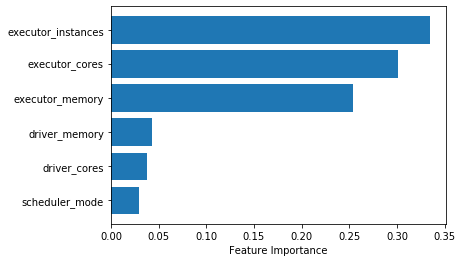

In [94]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])

import matplotlib.pyplot as plt
sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [91]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])


feature_importances_df = pd.DataFrame(
    {"feature":list(df.columns),"importance":rf.feature_importances_}
).sort_values("importance",ascending=False)

feature_importances_df

,feature,importance
0,executor_instances,0.334539
2,executor_cores,0.301447
1,executor_memory,0.254191
3,driver_memory,0.043072
4,driver_cores,0.037459
5,scheduler_mode,0.029291
